<a href="https://colab.research.google.com/github/Palak730/Tedtalks-View-Prediction/blob/main/Tedtalks_View_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Project Name**    -  **Ted Talks View Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages. Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDX chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

# **GitHub Link -**

Provide your GitHub Link here.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [215]:
# Data manipulation libraries
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import calendar

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Datatime library for Date columns
from datetime import datetime
import datetime as dt

# for remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
# For build pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from tabulate import tabulate

# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor


# for plot decision tree
from sklearn import tree

# Model selection libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# importing XGB regressor
from xgboost import XGBRegressor

# Metrics libraries for model evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Warnings module handles warnings in Python
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [216]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [217]:
file_path = '/content/drive/MyDrive/'
data=pd.read_csv(file_path + '/data_ted_talks.csv')

### Dataset First View

In [218]:
# Dataset First Look
data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [219]:
# Dataset Rows & Columns count
data.shape

(4005, 19)

### Dataset Information

In [220]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [221]:
data.describe(include='all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,4005,4005,3350.000000,4005.000000,4005,4005,4005,4005,4005
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,12,3902,NaN,NaN,3977,4005,4005,4005,4005
top,NaN,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07,TED-Ed,en,['en'],NaN,NaN,"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,NaN,1,34,34,53,10,NaN,97,27,556,3957,24,NaN,NaN,8,1,1,1,1
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,NaN,NaN,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,NaN,NaN,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,NaN,NaN,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN
50%,2333.000000,NaN,NaN,NaN,NaN,NaN,1.375508e+06,NaN,NaN,NaN,NaN,NaN,89.000000,738.000000,NaN,NaN,NaN,NaN,NaN
75%,23777.000000,NaN,NaN,NaN,NaN,NaN,2.133110e+06,NaN,NaN,NaN,NaN,NaN,188.000000,974.000000,NaN,NaN,NaN,NaN,NaN


#### Duplicate Values

In [222]:
# Dataset Duplicate Value Count
data = data.drop_duplicates()

#### Missing Values/Null Values

In [223]:
# Missing Values/Null Values Count
data.isnull().sum().sort_values(ascending = False)

comments          655
occupations       522
about_speakers    503
all_speakers        4
recorded_date       1
talk_id             0
description         0
url                 0
related_talks       0
topics              0
duration            0
event               0
available_lang      0
native_lang         0
title               0
published_date      0
views               0
speaker_1           0
transcript          0
dtype: int64

In [224]:
#Replace all the null value with 0
data.fillna(0, inplace = True)

In [225]:
# Visualizing the missing values
data.isnull().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

In [226]:
# Check the data types of each column
variable_types = data.dtypes
print(variable_types)


talk_id             int64
title              object
speaker_1          object
all_speakers       object
occupations        object
about_speakers     object
views               int64
recorded_date      object
published_date     object
event              object
native_lang        object
available_lang     object
comments          float64
duration            int64
topics             object
related_talks      object
url                object
description        object
transcript         object
dtype: object


## ***2. Categorizing Variable Types***

In [227]:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [228]:
# Identify numerical variables
numerical_variables = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Variables:")
print(numerical_variables)


Numerical Variables:
Index(['talk_id', 'views', 'comments', 'duration'], dtype='object')


In [229]:
# Identify categorical variables
categorical_variables = data.select_dtypes(include=['object']).columns
print("Categorical Variables:")
print(categorical_variables)

Categorical Variables:
Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers',
       'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'topics', 'related_talks', 'url', 'description',
       'transcript'],
      dtype='object')


In [230]:
# target variable is "views" variable
view_stats = data['views'].describe()
print(view_stats)

count    4.005000e+03
mean     2.148006e+06
std      3.451226e+06
min      0.000000e+00
25%      8.820690e+05
50%      1.375508e+06
75%      2.133110e+06
max      6.505195e+07
Name: views, dtype: float64


## 3. ***Data Wrangling***

To change the dates from object to datetime format in our DataFrame, we can use the pd.to_datetime()

In [231]:
# Assuming 'data' is your DataFrame
data['recorded_date'] = pd.to_datetime(data['recorded_date'], format='%Y/%m/%d')
data['published_date'] = pd.to_datetime(data['published_date'], format='%Y/%m/%d')

In [232]:

data['published_date'] = pd.to_datetime(data['published_date'])

#Calculate the published year using published_date
data['published_year'] = data['published_date'].dt.year
# Extract the month from 'published_date' and create a new column 'published_month'
data['published_month'] = data['published_date'].dt.strftime('%B')

#Calculate the weekday using published_date
data['weekday'] = data['published_date'].dt.weekday

#Calculate the published day using published_date
data['published_day'] = data['published_date'].dt.day

day_mapping = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
data['weekday'] = data['weekday'].apply(lambda x: day_mapping[x])

# Calculate the video age in days

current_date = pd.Timestamp(data['published_date'].max().date()) + timedelta(days=1)
data['video_age'] = (current_date - data['published_date']).dt.days


In [233]:
data['published_date'] = pd.to_datetime(data['published_date'])
data['daily_avg_views'] = data.groupby('published_date')['views'].transform('mean')

In [234]:
data.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,related_talks,url,description,transcript,published_year,published_month,weekday,published_day,video_age,daily_avg_views
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,June,Mon,27,5057,17532386.4
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,"{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,June,Mon,27,5057,17532386.4


##  **EXPLORATORY DATA ANALYSIS AND VISUALIZATION**

#### Distribution of views: The number of views may follow a right-skewed distribution, with a few talks having exceptionally high views.

In [235]:
data[numerical_variables].describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,4005.000000,4005.000000
mean,12432.538327,2.148006e+06,135.503121,724.011236
std,17447.576262,3.451226e+06,253.065532,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,17.000000,393.000000
50%,2333.000000,1.375508e+06,68.000000,738.000000
75%,23777.000000,2.133110e+06,162.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


**1.The frequency with which videos are uploaded throughout the year**

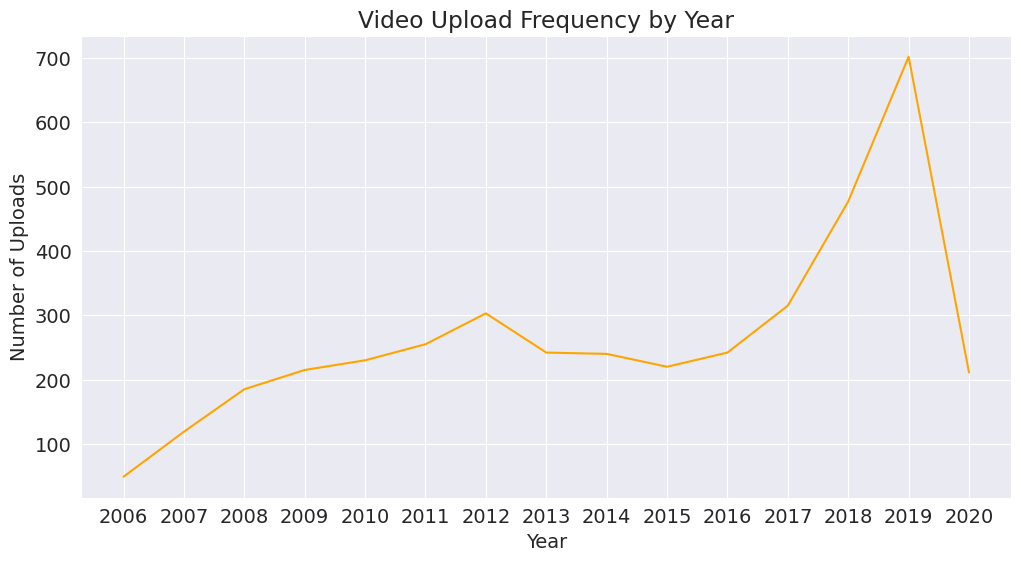

In [236]:
# Count the number of videos uploaded in each year
upload_frequency = data['published_year'].value_counts().sort_index()

# Plot the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x=upload_frequency.index, y=upload_frequency.values , color = 'orange')
plt.xlabel('Year')
plt.ylabel('Number of Uploads')
plt.title('Video Upload Frequency by Year')
plt.xticks(upload_frequency.index)
plt.show()


The analysis of video upload frequency reveals a gradual increase in the number of videos each year, with a significant drop in 2020 likely attributed to the impact of the pandemic. The peak period of video uploads occurred between 2018 and 2019, indicating a period of high activity in sharing TED Talks.

 **2.The frequency with which videos are uploaded throughout the months**

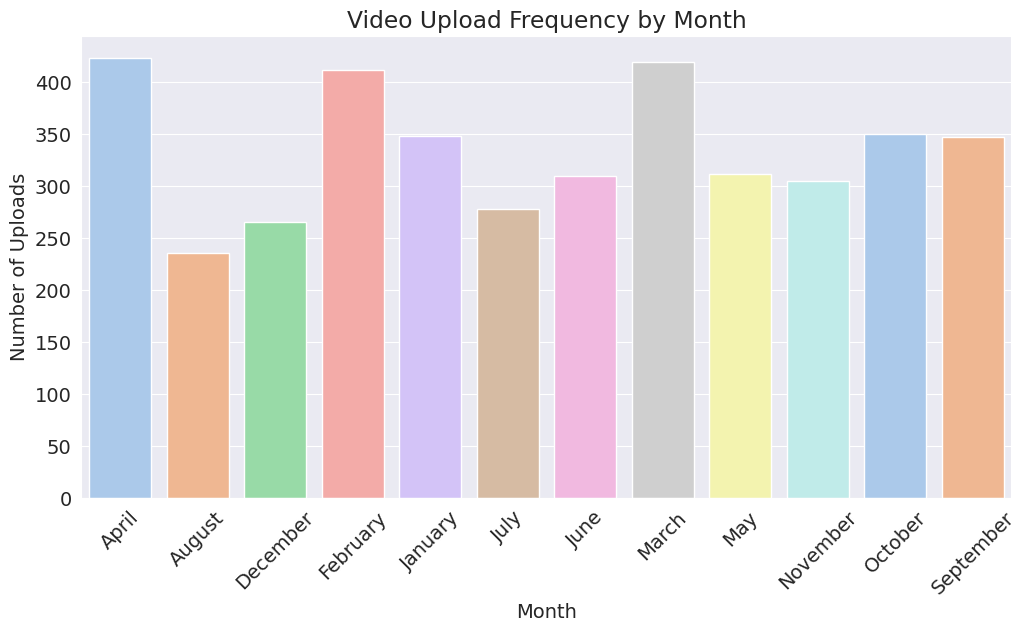

In [237]:
# Count the number of videos uploaded in each month
upload_frequency = data['published_month'].value_counts().sort_index()

# Define a color palette
colors = sns.color_palette('pastel')

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=upload_frequency.index, y=upload_frequency.values, palette=colors)
plt.xlabel('Month')
plt.ylabel('Number of Uploads')
plt.title('Video Upload Frequency by Month')
plt.xticks(rotation=45)
plt.show()


The months of April, February, and March had the highest number of video uploads, indicating a peak in content creation during those months.

 **3. The frequency with which videos are uploaded throughout the months.**

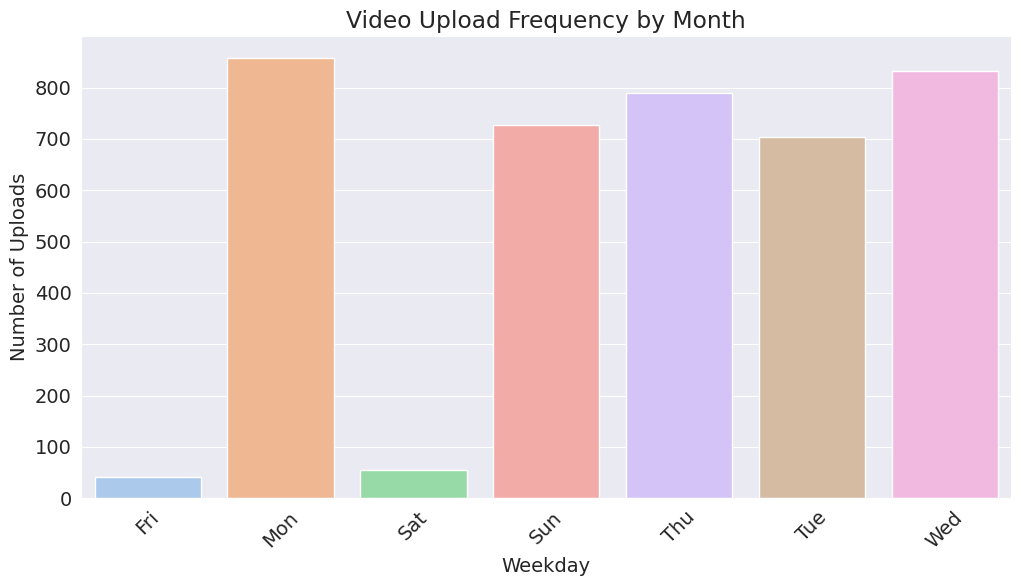

In [238]:
# Count the number of videos uploaded in weekday
upload_frequency = data['weekday'].value_counts().sort_index()

# Define a color palette
colors = sns.color_palette('pastel')

# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=upload_frequency.index, y=upload_frequency.values, palette=colors)
plt.xlabel('Weekday')
plt.ylabel('Number of Uploads')
plt.title('Video Upload Frequency by Month')
plt.xticks(rotation=45)
plt.show()

#### The analysis reveals that Monday and Wednesday have the highest frequency of video uploads, surpassing 800 videos. These weekdays demonstrate a greater tendency for content creators to publish videos, indicating their popularity and effectiveness for reaching the audience.

 **4. Distribution of dependent or Target Variable and independent**

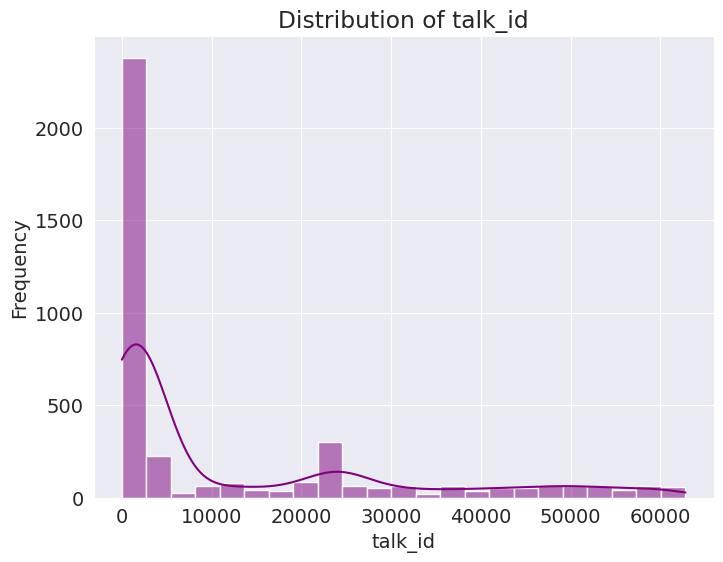

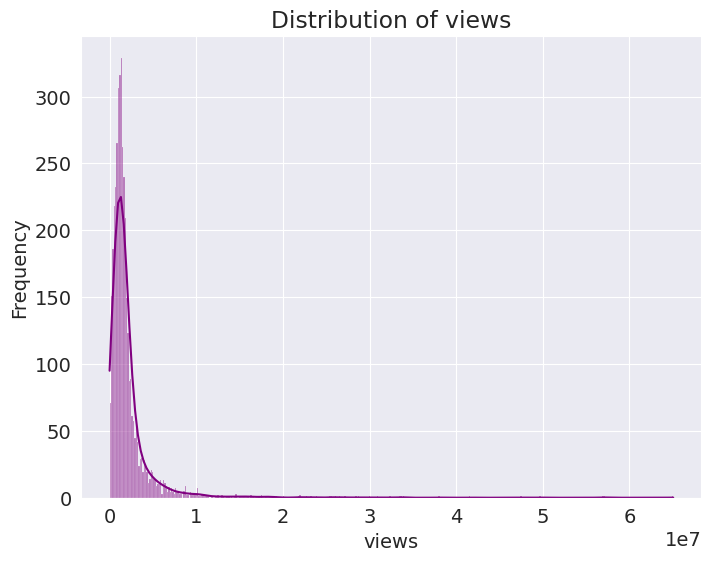

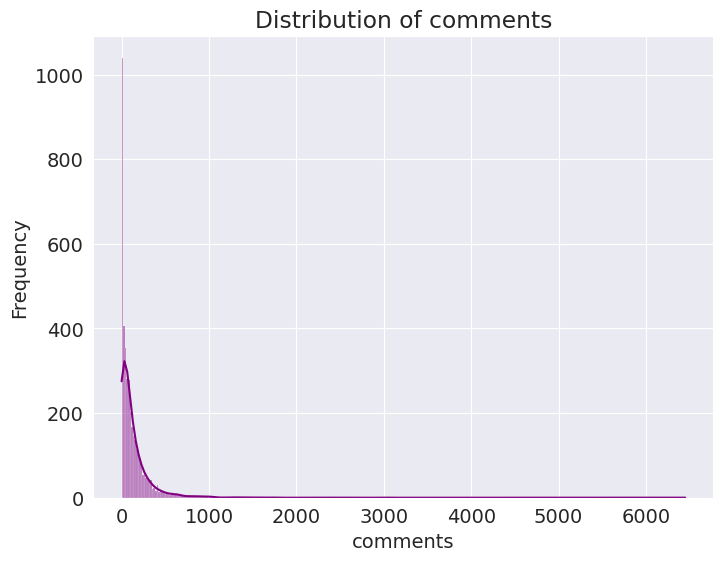

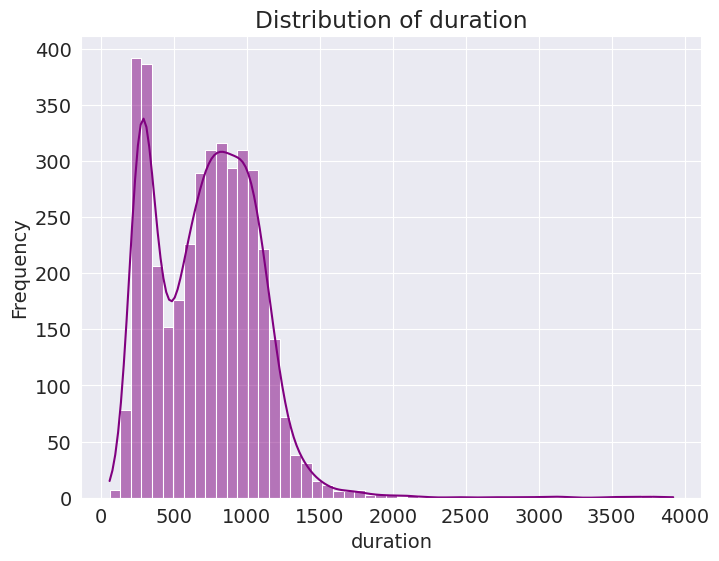

In [239]:
for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[var] , kde = True , color ='purple')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

Based on the provided graph, it is evident that both the independent and dependent variables exhibit right-skewed distributions and show similar patterns. To address this skewness and achieve a more normalized distribution, a log transformation can be applied to both variables.

**5. Predict potential relationships and correlations between the numerical variables. These insights can help in understanding the patterns and trends within the dataset, guiding further analysis and modeling decisions.**

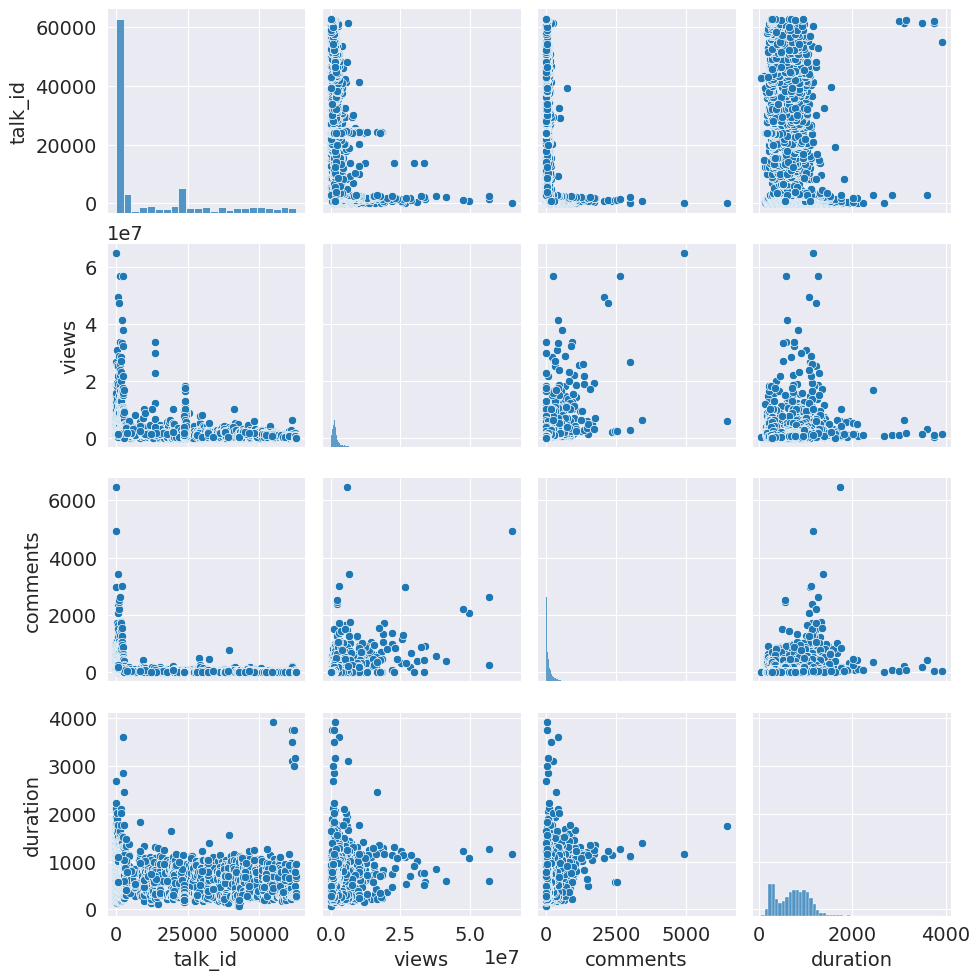

In [240]:
sns.pairplot(data[numerical_variables])
plt.show()

The pair plot allows us to identify patterns, trends, and potential correlations between the numerical variables. We can observe the strength and direction of the relationships between variables and look for any outliers or unusual patterns.

**6. Trend in views over time: Analyzing the trend in views over time can reveal if there is an increasing or decreasing interest in TED Talks.**


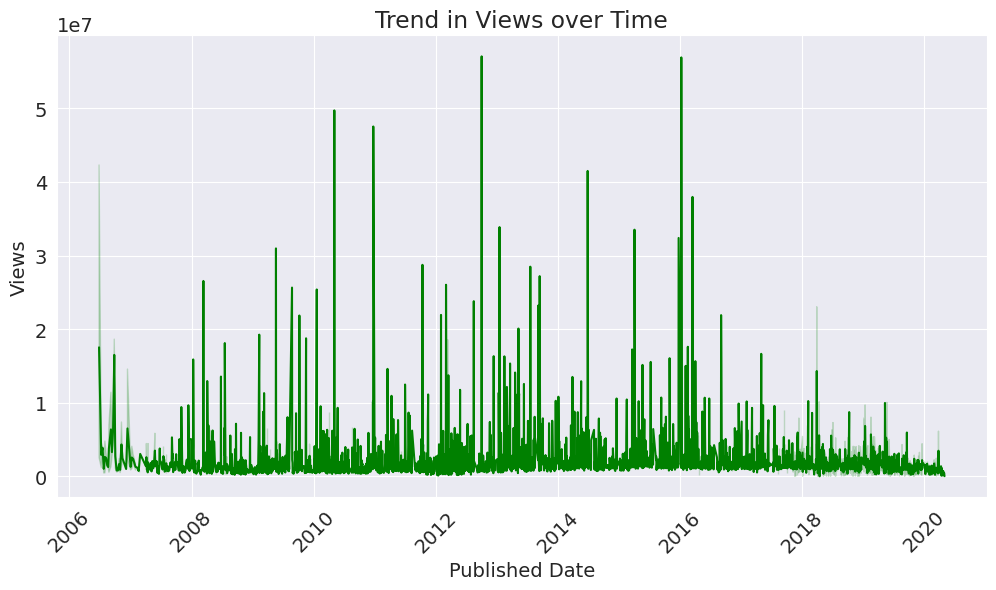

In [241]:
plt.figure(figsize=(12, 6 ))
sns.lineplot(x='published_date', y='views', data=data , color ='green')
plt.xlabel('Published Date')
plt.ylabel('Views')
plt.title('Trend in Views over Time')
plt.xticks(rotation=45)
plt.show()

The trend analysis of views over time suggests an increasing interest in TED Talks from 2012 to 2016, followed by a decreasing trend thereafter.

#### **7. In the dataset, we sorted the talks by the number of views in descending order and selected the top 10 viewed talks.**

+------+---------------------------------------------------+-------------------------+----------+
|      | title                                             | all_speakers            |    views |
|------+---------------------------------------------------+-------------------------+----------|
|    4 | Do schools kill creativity?                       | {0: 'Sir Ken Robinson'} | 65051954 |
| 1296 | Your body language may shape who you are          | {0: 'Amy Cuddy'}        | 57074270 |
| 2062 | This is what happens when you reply to spam email | {0: 'James Veitch'}     | 56932551 |
|  646 | How great leaders inspire action                  | {0: 'Simon Sinek'}      | 49730580 |
|  796 | The power of vulnerability                        | {0: 'Brené Brown'}      | 47544833 |
| 1724 | How to speak so that people want to listen        | {0: 'Julian Treasure'}  | 41504331 |
| 2108 | Inside the mind of a master procrastinator        | {0: 'Tim Urban'}        | 37976820 |
| 1366 | Looks aren'

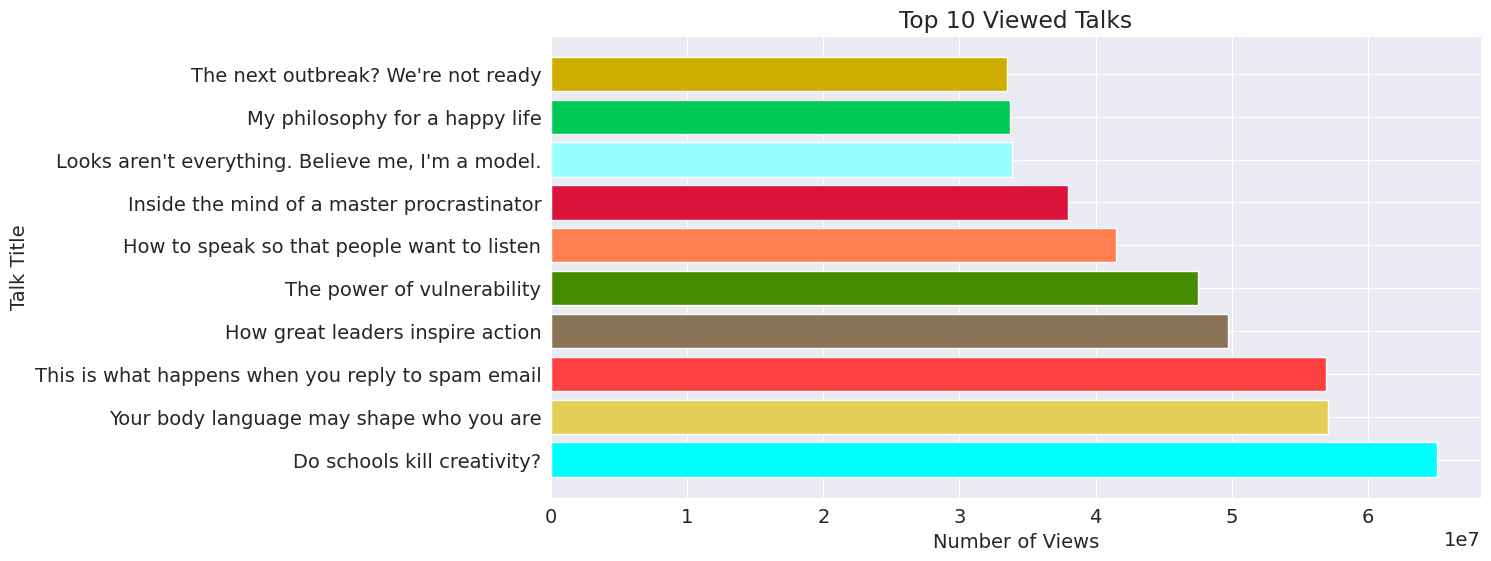

In [242]:
# Sort the dataset by 'views' in descending order and select top 10 viewed talks
most_viewed_talks = data[['title', 'all_speakers', 'views']].sort_values(by='views', ascending=False)[:10]

# Display the top 10 viewed talks in tabular form
print(tabulate(most_viewed_talks, headers='keys', tablefmt='psql'))
# Define a color palette for the bar graph
colors = ['#00FFFF', '#E3CF57', '#FF4040', '#8B7355', '#458B00', '#FF7F50', '#DC143C', '#97FFFF', '#00C957', '#CDAD00']
# Create a bar graph to visualize the top 10 viewed talks with different colors
plt.figure(figsize=(12, 6))
plt.barh(most_viewed_talks['title'], most_viewed_talks['views'], color=colors)
plt.xlabel('Number of Views')
plt.ylabel('Talk Title')
plt.title('Top 10 Viewed Talks')

plt.show()

#####  By analyzing these talks, we can gain an understanding of the topics and speakers that resonate with the TED audience and potentially uncover patterns or trends in their success.

 **8. The scatter plots are also generated to visualize the relationship between talk duration and viewer engagement (views and comments).**

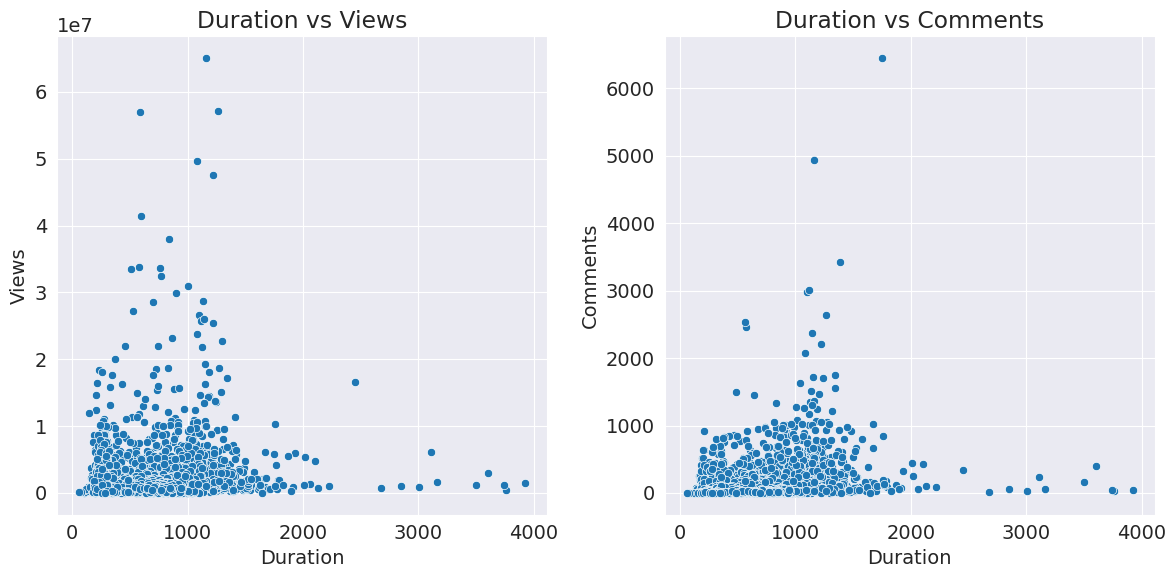

In [243]:
# Select the relevant columns for the prediction
selected_columns = ['duration', 'views', 'comments']
# Create a new DataFrame with the selected columns
df_selected = data[selected_columns]

# Create scatter plots to visualize the relationship between duration and views/comments
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_selected, x='duration', y='views')
plt.xlabel('Duration')
plt.ylabel('Views')
plt.title('Duration vs Views')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_selected, x='duration', y='comments')
plt.xlabel('Duration')
plt.ylabel('Comments')
plt.title('Duration vs Comments')

plt.tight_layout()
plt.show()

Based on the information provided, it seems that the scatter plots for 'Duration vs Views' and 'Duration vs Comments' indicate that the maximum values for both  comments and views occur within the range of 0-2000 duration, with values ranging from 0 to 3.

**9. The purpose of this code is to visually represent the popularity of different topics in TED Talks through a bar chart.**

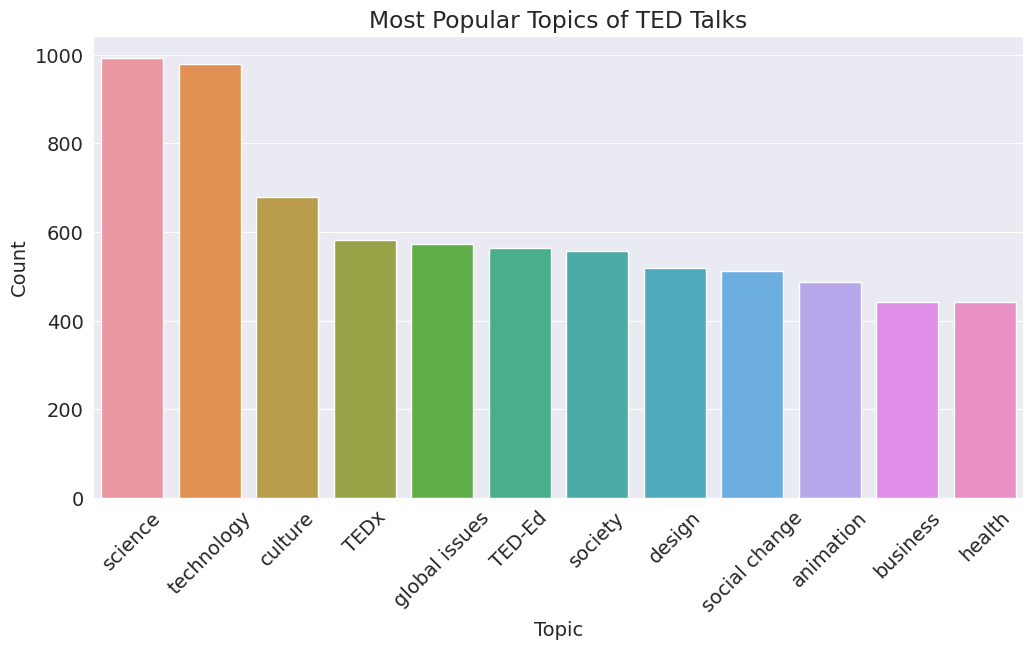

In [244]:
import ast
# use duplicate DataFrame for topics analysis
df = data.copy()
# Convert the 'topics' column to a string representation
df['topics'] = df['topics'].apply(lambda x: str(x))
# Apply literal_eval to convert the string representation to a list
df['topics'] = df['topics'].apply(lambda x: ast.literal_eval(x))
# Stack the topics into a new DataFrame
s = df['topics'].apply(pd.Series).stack().reset_index(level=1, drop=True)
s.name = 'topic'
# Drop the original 'topics' column and join the new 'topic' column
df = df.drop('topics', axis=1).join(s)
# Plot a bar chart of popular topics of TED Talks
pop_topic = pd.DataFrame(df['topic'].value_counts()).reset_index()
pop_topic.columns = ['topic', 'TED Talks']
plt.figure(figsize=(12, 6))
sns.barplot(x='topic', y='TED Talks', data=pop_topic.head(12))
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Most Popular Topics of TED Talks')
plt.xticks(rotation=45)
plt.show()


It is focused on analyzing and visualizing the popularity of topics in TED Talks based on the available data.

<Axes: >

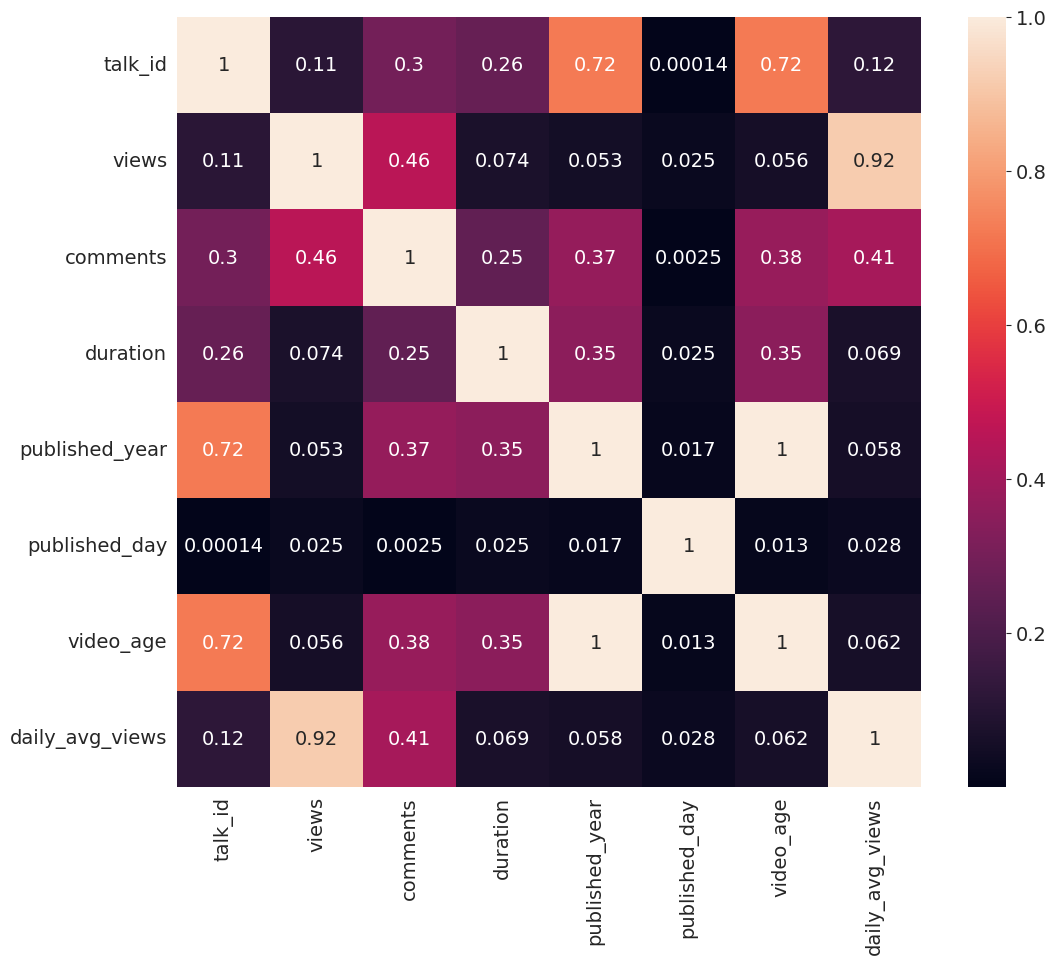

In [250]:
plt.figure(figsize=(12,10))
correlation = data.corr()
sns.heatmap(abs(correlation), annot=True)

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [251]:
# dropping unneccessary columns
data.drop(columns= ['talk_id', 'title','' 'speaker_1', 'occupations', 'all_speakers' , 'recorded_date', 'published_date','about_speakers',
                                 'event', 'url','description','transcript','native_lang','related_talks' , 'available_lang', 'topics'], inplace=True)



In [252]:
data.columns

Index(['views', 'comments', 'duration', 'published_year', 'published_month',
       'weekday', 'published_day', 'video_age', 'daily_avg_views'],
      dtype='object')

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005 entries, 0 to 4004
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   views            4005 non-null   int64  
 1   comments         4005 non-null   float64
 2   duration         4005 non-null   int64  
 3   published_year   4005 non-null   int64  
 4   published_month  4005 non-null   object 
 5   weekday          4005 non-null   object 
 6   published_day    4005 non-null   int64  
 7   video_age        4005 non-null   int64  
 8   daily_avg_views  4005 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 441.9+ KB


In [254]:
# Create a dictionary to map abbreviated month names to numerical month format
month_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Define a function to convert month names to numerical month format
def convert_to_numerical_month(month_name):
    return month_dict.get(month_name, 0)

# Apply the function to the 'published_month' column
data['published_month'] = data['published_month'].apply(convert_to_numerical_month).astype('int64')

# Create a dictionary to map abbreviated day names to day of the week numbers
day_to_number = {
    'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7
}
# Replace NaN values in 'weekday' with 0
data['weekday'].fillna(0, inplace=True)
# Convert 'weekday' to numerical day of the week format (1=Monday, 1=Tuesday, ..., 7=Sunday)
data['weekday'] = data['weekday'].map(day_to_number).astype('int64')



In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005 entries, 0 to 4004
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   views            4005 non-null   int64  
 1   comments         4005 non-null   float64
 2   duration         4005 non-null   int64  
 3   published_year   4005 non-null   int64  
 4   published_month  4005 non-null   int64  
 5   weekday          4005 non-null   int64  
 6   published_day    4005 non-null   int64  
 7   video_age        4005 non-null   int64  
 8   daily_avg_views  4005 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 441.9 KB


In [256]:
data.head(1)

,views,comments,duration,published_year,published_month,weekday,published_day,video_age,daily_avg_views
0,3523392,272.0,977,2006,6,1,27,5057,17532386.4


In [257]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Calculate the number of outliers for each column
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

# Display the number of outliers for each column
print(outliers)


views              393
comments           297
duration            21
published_year       0
published_month      0
weekday              0
published_day        0
video_age            0
daily_avg_views    368
dtype: int64


In [258]:

# Replacing outliers with IQR values
for i in ['views', 'comments', 'duration', 'published_year', 'published_month',
       'weekday', 'published_day', 'video_age' ,'daily_avg_views' ]:
  Q1 = data[i].quantile(0.25)
  Q3 = data[i].quantile(0.75)
  IQR = Q3 - Q1
# condition to change outliers to lower limit and upper limit value
  data[i]=np.where(data[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(data[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),data[i]))

#Let's check the outliers again
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()


views              0
comments           0
duration           0
published_year     0
published_month    0
weekday            0
published_day      0
video_age          0
daily_avg_views    0
dtype: int64

In [259]:
# Let's create Y as Dependent Variable
y = data['views']
# Let's create X as Indepndent variables
X = data.drop(columns='views')
#list of X columns
X.columns

Index(['comments', 'duration', 'published_year', 'published_month', 'weekday',
       'published_day', 'video_age', 'daily_avg_views'],
      dtype='object')

In [260]:
print(X[X.isin([np.nan, np.inf, -np.inf])].sum())

comments           0.0
duration           0.0
published_year     0.0
published_month    0.0
weekday            0.0
published_day      0.0
video_age          0.0
daily_avg_views    0.0
dtype: float64


In [261]:
# Convert columns to numeric data types if needed
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc(X):

# Calculate VIF for each independent variable
 vif = pd.DataFrame()
 vif["Features"] = X.columns
 vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

 return(vif)


**Models used for predictions:**  
1.  Linear Regression
2.  Lasso Regression
3.  Ridge Regression
4.  Elastic Net Regression
5.  Decision Tree
6.  Random Forest Regression
7.  GradientBoostingRegressor
8.  XGB Regression


- Training a model means creating or learning the relationship between features (input variables) and the label (output variable).

- Preprocess the data, handle missing values, and split the dataset into training and testing sets.

- Train each model using the training data and evaluate their performance on the test data using metrics like MAE, MSE, RMSE, R2, and Adjusted R2.

- Compare the performance of each model on the test data to select the best performing one.

- Implement specific algorithms for each model and handle any specific requirements, such as regularization for Lasso and Ridge Regression, ensemble methods for Random Forest and GradientBoostingRegressor.

- Ensure you choose appropriate hyperparameters for each algorithm to optimize their performance.

In [262]:
# calling train_test_split() to get the training and testing data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)
# split sizes
print(X_train.shape)
print(X_test.shape)


(3204, 8)
(801, 8)


In [263]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_train_pred_linear = linear_reg.predict(X_train)
y_test_pred_linear = linear_reg.predict(X_test)

# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_train_pred_lasso = lasso_reg.predict(X_train)
y_test_pred_lasso = lasso_reg.predict(X_test)

# Ridge Regression
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)

# Elastic Net Regression
elastic_net_reg = ElasticNet()
elastic_net_reg.fit(X_train, y_train)
y_train_pred_elastic_net = elastic_net_reg.predict(X_train)
y_test_pred_elastic_net = elastic_net_reg.predict(X_test)

# Decision Tree
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)
y_train_pred_decision_tree = decision_tree_reg.predict(X_train)
y_test_pred_decision_tree = decision_tree_reg.predict(X_test)

# Random Forest Regression
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
y_train_pred_random_forest = random_forest_reg.predict(X_train)
y_test_pred_random_forest = random_forest_reg.predict(X_test)

# GradientBoostingRegressor
gradient_boosting_reg = GradientBoostingRegressor()
gradient_boosting_reg.fit(X_train, y_train)
y_train_pred_gradient_boosting = gradient_boosting_reg.predict(X_train)
y_test_pred_gradient_boosting = gradient_boosting_reg.predict(X_test)

# XGB Regression
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_train_pred_xgb = xgb_reg.predict(X_train)
y_test_pred_xgb = xgb_reg.predict(X_test)

# Evaluation metrics
def calculate_metrics(y_train, y_train_pred, y_test, y_test_pred):
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    LR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    return train_mae, test_mae, train_mse, test_mse, train_rmse, test_rmse, train_r2, test_r2 , LR_Adjusted_R2

# Calculate metrics for each model
linear_reg_metrics = calculate_metrics(y_train, y_train_pred_linear, y_test, y_test_pred_linear)
lasso_reg_metrics = calculate_metrics(y_train, y_train_pred_lasso, y_test, y_test_pred_lasso)
ridge_reg_metrics = calculate_metrics(y_train, y_train_pred_ridge, y_test, y_test_pred_ridge)
elastic_net_reg_metrics = calculate_metrics(y_train, y_train_pred_elastic_net, y_test, y_test_pred_elastic_net)
decision_tree_reg_metrics = calculate_metrics(y_train, y_train_pred_decision_tree, y_test, y_test_pred_decision_tree)
random_forest_reg_metrics = calculate_metrics(y_train, y_train_pred_random_forest, y_test, y_test_pred_random_forest)
gradient_boosting_reg_metrics = calculate_metrics(y_train, y_train_pred_gradient_boosting, y_test, y_test_pred_gradient_boosting)
xgb_reg_metrics = calculate_metrics(y_train, y_train_pred_xgb, y_test, y_test_pred_xgb)




In [264]:
# Create a dictionary to store the metrics
metrics_dict = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression',
              'Decision Tree', 'Random Forest Regression', 'GradientBoostingRegressor', 'XGB Regression'],
    'Train MAE': [linear_reg_metrics[0], lasso_reg_metrics[0], ridge_reg_metrics[0], elastic_net_reg_metrics[0],
                  decision_tree_reg_metrics[0], random_forest_reg_metrics[0], gradient_boosting_reg_metrics[0], xgb_reg_metrics[0]],
    'Test MAE': [linear_reg_metrics[1], lasso_reg_metrics[1], ridge_reg_metrics[1], elastic_net_reg_metrics[1],
                 decision_tree_reg_metrics[1], random_forest_reg_metrics[1], gradient_boosting_reg_metrics[1], xgb_reg_metrics[1]],
    'Train MSE': [linear_reg_metrics[2], lasso_reg_metrics[2], ridge_reg_metrics[2], elastic_net_reg_metrics[2],
                  decision_tree_reg_metrics[2], random_forest_reg_metrics[2], gradient_boosting_reg_metrics[2], xgb_reg_metrics[2]],
    'Test MSE': [linear_reg_metrics[3], lasso_reg_metrics[3], ridge_reg_metrics[3], elastic_net_reg_metrics[3],
                 decision_tree_reg_metrics[3], random_forest_reg_metrics[3], gradient_boosting_reg_metrics[3], xgb_reg_metrics[3]],
    'Train RMSE': [linear_reg_metrics[4], lasso_reg_metrics[4], ridge_reg_metrics[4], elastic_net_reg_metrics[4],
                   decision_tree_reg_metrics[4], random_forest_reg_metrics[4], gradient_boosting_reg_metrics[4], xgb_reg_metrics[4]],
    'Test RMSE': [linear_reg_metrics[5], lasso_reg_metrics[5], ridge_reg_metrics[5], elastic_net_reg_metrics[5],
                  decision_tree_reg_metrics[5], random_forest_reg_metrics[5], gradient_boosting_reg_metrics[5], xgb_reg_metrics[5]],
    'Train R2': [linear_reg_metrics[6], lasso_reg_metrics[6], ridge_reg_metrics[6], elastic_net_reg_metrics[6],
                 decision_tree_reg_metrics[6], random_forest_reg_metrics[6], gradient_boosting_reg_metrics[6], xgb_reg_metrics[6]],
    'Test R2': [linear_reg_metrics[7], lasso_reg_metrics[7], ridge_reg_metrics[7], elastic_net_reg_metrics[7],
                decision_tree_reg_metrics[7], random_forest_reg_metrics[7], gradient_boosting_reg_metrics[7], xgb_reg_metrics[7]],
    'LR_Adjusted_R2' : [linear_reg_metrics[8], lasso_reg_metrics[8], ridge_reg_metrics[8], elastic_net_reg_metrics[8],
                decision_tree_reg_metrics[8], random_forest_reg_metrics[8], gradient_boosting_reg_metrics[8], xgb_reg_metrics[8]],

}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Display the table
print((tabulate(metrics_df, headers='keys', tablefmt='psql')))

+----+---------------------------+-------------+------------+-------------+-------------+--------------+-------------+------------+-----------+------------------+
|    | Model                     |   Train MAE |   Test MAE |   Train MSE |    Test MSE |   Train RMSE |   Test RMSE |   Train R2 |   Test R2 |   LR_Adjusted_R2 |
|----+---------------------------+-------------+------------+-------------+-------------+--------------+-------------+------------+-----------+------------------|
|  0 | Linear Regression         |   332283    |     328330 | 3.13049e+11 | 3.04342e+11 |     559508   |      551672 |   0.742966 |  0.747481 |         0.74493  |
|  1 | Lasso Regression          |   332286    |     328550 | 3.13055e+11 | 3.04291e+11 |     559513   |      551626 |   0.742961 |  0.747523 |         0.744973 |
|  2 | Ridge Regression          |   332285    |     328543 | 3.13055e+11 | 3.04292e+11 |     559513   |      551627 |   0.742962 |  0.747522 |         0.744972 |
|  3 | Elastic Net Reg

# **Conclusion**



1. Exploratory Data Analysis (EDA) revealed valuable insights into the dataset, such as the distribution of views, comments, and duration. It helped us identify outliers and understand the relationships between different features.

2. Preprocessing the data involved handling missing values, converting date features, and encoding categorical variables. Outliers were replaced using IQR values to improve model performance.

3. We applied various regression algorithms, including Linear Regression, Lasso Regression, Ridge Regression, Elastic Net Regression, Decision Tree, Random Forest Regression, GradientBoostingRegressor, and XGB Regression, to predict the number of views for TED Talk videos.

4. The Decision Tree model performed exceptionally well, showing a very low Mean Absolute Error (MAE) for both train and test datasets, indicating a good fit to the data.

5. The Linear Regression models (Linear, Lasso, Ridge, Elastic Net) had relatively higher MAE values, suggesting that they might not capture the complexities of the data as effectively as the tree-based models.

6. Random Forest Regression, GradientBoostingRegressor, and XGB Regression also performed well, with lower MAE and RMSE values compared to Linear Regression models, indicating their capability to capture nonlinear relationships in the data.

7. The R-squared values for all models were relatively high, indicating that the models explained a significant portion of the variance in the number of views. This suggests that the chosen features have a strong influence on the views.

8. In conclusion, the Decision Tree, Random Forest, Gradient Boosting, and XGB Regression models are recommended for predicting the number of views for TED Talk videos. Further fine-tuning and feature engineering could potentially enhance model performance. Overall, this project demonstrates how data analysis and machine learning techniques can be utilized to gain valuable insights and build predictive models for real-world applications.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***